# KMeans Clustering

#### Importing Packages

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

#### Dataset

In [2]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

#### Scatter Plot 

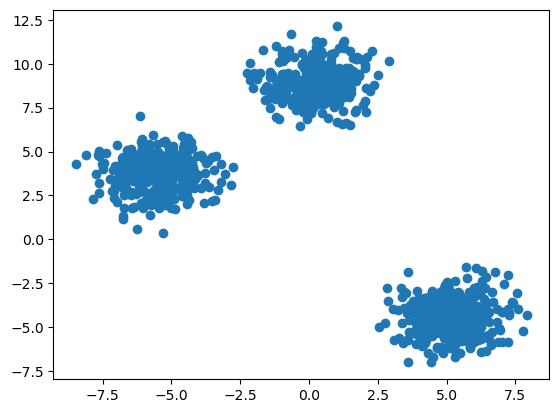

In [4]:
plt.scatter(X[:,0],X[:,1])

#### Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

#### KMeans Clustering

In [7]:
from sklearn.cluster import KMeans

We need the value of k(no. of clusters), for that we have to use elbow method. 
Elbow method can be done in both manually or by using library.
manual method is used for small datasets whereas for huge dataset we use package method

##### 1. Manual method for finding value of k (Elbow method manually)

Elbow method to select K value

In [8]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [9]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.467788465513,
 992.0708509383511,
 853.6002278169217,
 763.0591307807654,
 671.6878994158205,
 579.6112524715687,
 536.6619533360063]

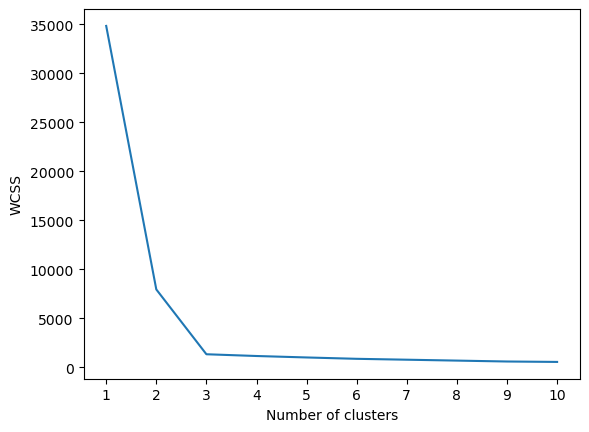

In [10]:
#Plot for elbow method
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Insights
value of k will be 3

#### Model 

In [11]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [12]:
clusters = kmeans.fit_predict(X_train)

#### Plotting after Kmeans cluster

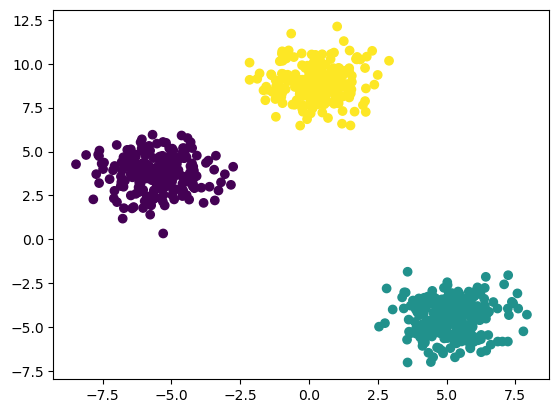

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=clusters)

##### 2. Using Library finding value of k(Elbow method using Library`)

In [14]:
!pip install Kneed

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from kneed import KneeLocator

In [16]:
k1 = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

#### Insights
the value of k = 3

# SILHOUETTE SCORE

In [17]:
from sklearn.metrics import silhouette_score

In [19]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [20]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4814001336222496,
 0.34142436082271643,
 0.344410489279831,
 0.34054876896108177,
 0.33994329261646156,
 0.3390487276626262]

#### plotting Silhouette score for each k value

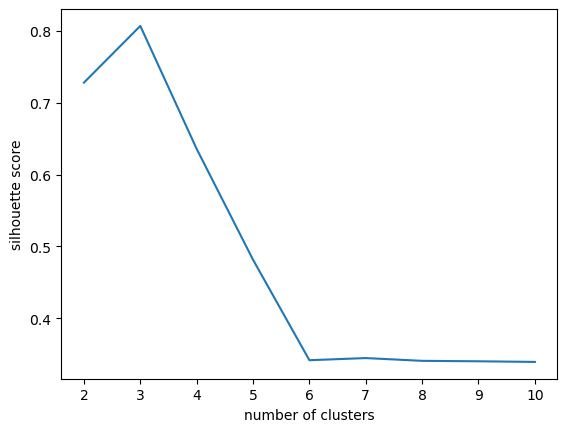

In [21]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

#### Insight
1. Silhouette score varies from -1 to 1. More closer to +1 indicates better performance and similarly more closer to -1 represents poor performance.
2. By seeing above plot for number of clusters = 3 we are getting maximum silhouette score (0.8). 
